<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

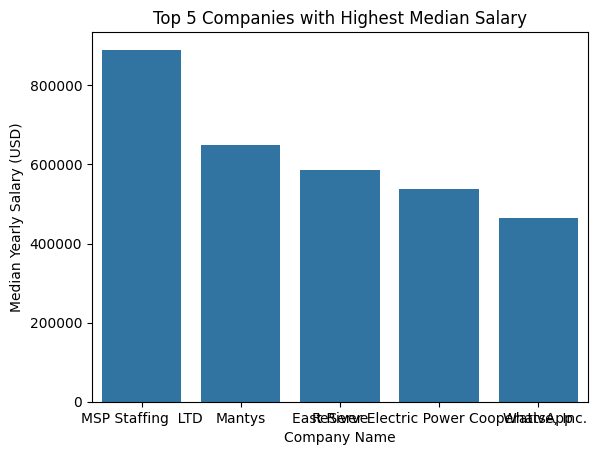

In [30]:
df_top = df.dropna(subset='salary_year_avg')
df_top = df_top.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(df_top, x='company_name', y='salary_year_avg')
plt.title('Top 5 Companies with Highest Median Salary')
plt.ylabel('Median Yearly Salary (USD)')
plt.xlabel('Company Name')
plt.show()

---

## 🟨 Data Scientist Salary Histogram (2.20.2)

Text(0.5, 0, 'Yearly Salary (USD)')

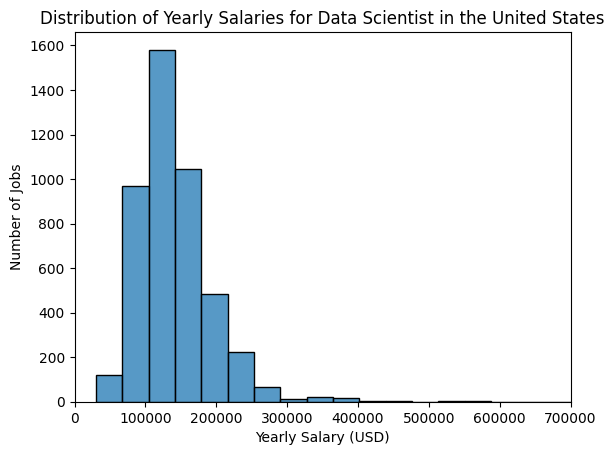

In [39]:
df_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
sns.histplot(df_ds['salary_year_avg'], bins=25)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

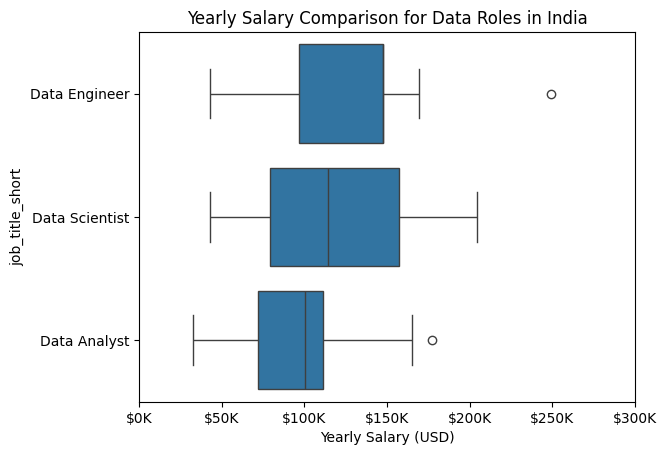

In [63]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

india_jobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

fig, ax = plt.subplots()
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
ax.set_xlabel('Yearly Salary (USD)')
ax.set_title('Yearly Salary Comparison for Data Roles in India')
ax.set_xlim(0, 300000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


---

## 🟨 Salary Distribution for United States (2.20.4)

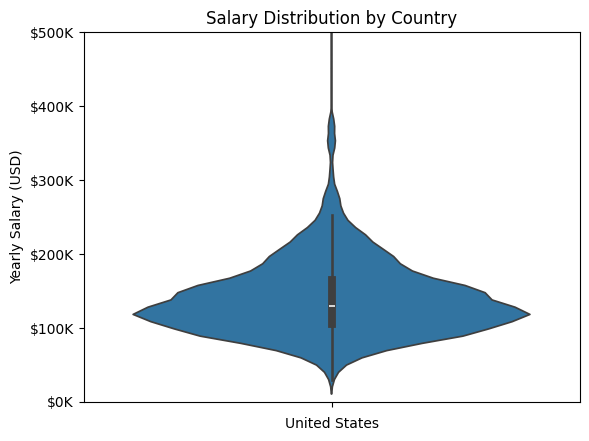

In [92]:
df_ds = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

sns.violinplot(df_ds, x='job_country', y='salary_year_avg')
plt.ylim(0, 500000)
plt.xlabel('United States')
plt.ylabel('Yearly Salary (USD)')
plt.title('Salary Distribution by Country')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().set_xticklabels([])
plt.show()

---